<a href="https://colab.research.google.com/github/Avishek-058/CSE_THESIS-CUET/blob/main/BERT_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Text Cleaning***

In [1]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
df = pd.read_csv('/content/sample_data/final_dataset.csv')

In [4]:
import re
import string
import contractions  # Install it using: pip install contractions

def clean_text(text):
    if not isinstance(text, str):
        return text  # Return as-is if it's not a string (e.g., NaN)

    # Expand contractions (e.g., "aren't" → "are not", "they're" → "they are")
    text = contractions.fix(text)

    # Fix abbreviations: Converts "U.S.A." → "USA", "I.B.M." → "IBM", etc.
    text = re.sub(r'\b([A-Za-z])(?:\.[A-Za-z])+\.?\b', lambda x: x.group().replace('.', ''), text)

    # Preserve hyphenated words (e.g., "state-of-the-art")
    text = re.sub(r'(\b\w+)-(\w+\b)', r'\1-\2', text)

    # Preserve decimal numbers (e.g., 3.14 should stay as 3.14)
    text = re.sub(r'(\d+)\.(\d+)', r'\1DOTPLACEHOLDER\2', text)

    # Remove apostrophes only if they don't indicate contractions (keeps possessives intact)
    text = re.sub(r"(?<!\w)'|'(?!\w)", "", text)

    # Replace all punctuation (except hyphens) with spaces
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation.replace("-", ""))), ' ', text)

    # Restore decimal points
    text = text.replace('DOTPLACEHOLDER', '.')

    # Normalize multiple spaces to a single space
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Example usage:
sample_text = "M.B.A US. should be USA. You SA should not change. They're going to the .U.K. It's IBM, not I.B.M. 3.14 should stay. Dr. John holds a Ph.D. in AI. State-of-the-art is useful."
cleaned_text = clean_text(sample_text)
print(cleaned_text)


MBA US should be USA You SA should not change They are going to the YOU K It is IBM not IBM 3.14 should stay Dr John holds a Ph D in AI State-of-the-art is useful


In [5]:
test_strings = [
    "Hello, World!",  # Basic punctuation
    "It's a great day.",  # Apostrophe handling
    "Python@3.9 is awesome!",  # Special characters
    "Hello... Are you there??",  # Multiple punctuation marks
    "Wow!!! This is amazing!!!",  # Consecutive exclamation marks
    "E-mail: test@example.com",  # Email-like text
    "$100 is a lot!",  # Currency symbol
    "i'm doing Don't state-of-the-art U.S.A. 3.14"
    " ",  # Empty space
    "",  # Empty string
    None  # NoneType
]

# Applying function to test cases
for text in test_strings:
    print(f"Original: {text}")
    print(f"Cleaned: {clean_text(text)}\n")


Original: Hello, World!
Cleaned: Hello World

Original: It's a great day.
Cleaned: It is a great day

Original: Python@3.9 is awesome!
Cleaned: Python 3.9 is awesome

Original: Hello... Are you there??
Cleaned: Hello Are you there

Original: Wow!!! This is amazing!!!
Cleaned: Wow This is amazing

Original: E-mail: test@example.com
Cleaned: E-mail test example com

Original: $100 is a lot!
Cleaned: 100 is a lot

Original: i'm doing Don't state-of-the-art U.S.A. 3.14 
Cleaned: i am doing Do not state-of-the-art YOU SA 3.14

Original: 
Cleaned: 

Original: None
Cleaned: None



In [6]:
# Apply function to DataFrame column
df['Review_Content_clean'] = df['Review_Content'].fillna('').apply(clean_text)

df.head()


,Category,Rating,Label,Review_Content,Review_Content_clean
0,Tools_and_Home_Improvement_5,3.0,0,"Good idea,but gave 3 stars because it didn't w...",Good idea but gave 3 stars because it did not ...
1,Pet_Supplies_5,5.0,1,Every batch has been great. It even smells aw...,Every batch has been great It even smells awesome
2,Clothing_Shoes_and_Jewelry_5,5.0,1,"This scarf was so cute in person, so happy I b...",This scarf was so cute in person so happy I bo...
3,Kindle_Store_5,4.0,1,I received this ARC from the publisher via net...,I received this ARC from the publisher via net...
4,Toys_and_Games_5,5.0,1,"Awesome kit, simple yet fun at the same time. ...",Awesome kit simple yet fun at the same time Ab...


In [7]:
df.to_csv('/content/clean_reviews.csv', index=False)

# ***UrL and Emails removing***

In [8]:
df['Review_Content_clean'] = df['Review_Content_clean'].apply(lambda x: re.sub(r'http\S+|www\S+', '<URL>', x))
df['Review_Content_clean'] = df['Review_Content_clean'].apply(lambda x: re.sub(r'\S+@\S+', '<EMAIL>', x))
df['Review_Content_clean'] = df['Review_Content_clean'].apply(lambda x: re.sub(r'@\w+', '<USER>', x))

In [9]:
df

,Category,Rating,Label,Review_Content,Review_Content_clean
0,Tools_and_Home_Improvement_5,3.0,0,"Good idea,but gave 3 stars because it didn't w...",Good idea but gave 3 stars because it did not ...
1,Pet_Supplies_5,5.0,1,Every batch has been great. It even smells aw...,Every batch has been great It even smells awesome
2,Clothing_Shoes_and_Jewelry_5,5.0,1,"This scarf was so cute in person, so happy I b...",This scarf was so cute in person so happy I bo...
3,Kindle_Store_5,4.0,1,I received this ARC from the publisher via net...,I received this ARC from the publisher via net...
4,Toys_and_Games_5,5.0,1,"Awesome kit, simple yet fun at the same time. ...",Awesome kit simple yet fun at the same time Ab...
...,...,...,...,...,...
9995,Kindle_Store_5,5.0,0,I totally loved this book. I couldn't put it d...,I totally loved this book I could not put it d...
9996,Tools_and_Home_Improvement_5,5.0,0,I ordered a couple of these to replace the old...,I ordered a couple of these to replace the old...
9997,Books_5,5.0,0,Wow! I absolutely loved this book. The charact...,Wow I absolutely loved this book The character...
9998,Electronics_5,4.0,1,Good product. Setup was a little difficult. So...,Good product Setup was a little difficult Soun...


# ***Text Lowering***

In [10]:
df['Review_Content_lower']= df['Review_Content_clean'].apply(lambda x: x.lower())

In [11]:
df

,Category,Rating,Label,Review_Content,Review_Content_clean,Review_Content_lower
0,Tools_and_Home_Improvement_5,3.0,0,"Good idea,but gave 3 stars because it didn't w...",Good idea but gave 3 stars because it did not ...,good idea but gave 3 stars because it did not ...
1,Pet_Supplies_5,5.0,1,Every batch has been great. It even smells aw...,Every batch has been great It even smells awesome,every batch has been great it even smells awesome
2,Clothing_Shoes_and_Jewelry_5,5.0,1,"This scarf was so cute in person, so happy I b...",This scarf was so cute in person so happy I bo...,this scarf was so cute in person so happy i bo...
3,Kindle_Store_5,4.0,1,I received this ARC from the publisher via net...,I received this ARC from the publisher via net...,i received this arc from the publisher via net...
4,Toys_and_Games_5,5.0,1,"Awesome kit, simple yet fun at the same time. ...",Awesome kit simple yet fun at the same time Ab...,awesome kit simple yet fun at the same time ab...
...,...,...,...,...,...,...
9995,Kindle_Store_5,5.0,0,I totally loved this book. I couldn't put it d...,I totally loved this book I could not put it d...,i totally loved this book i could not put it d...
9996,Tools_and_Home_Improvement_5,5.0,0,I ordered a couple of these to replace the old...,I ordered a couple of these to replace the old...,i ordered a couple of these to replace the old...
9997,Books_5,5.0,0,Wow! I absolutely loved this book. The charact...,Wow I absolutely loved this book The character...,wow i absolutely loved this book the character...
9998,Electronics_5,4.0,1,Good product. Setup was a little difficult. So...,Good product Setup was a little difficult Soun...,good product setup was a little difficult soun...


In [12]:
df.to_csv('/content/lower_reviews.csv', index=False)

# ***Lemmatizing***

In [13]:
!rm -rf /root/nltk_data
!mkdir -p /root/nltk_data
!python -m nltk.downloader -d /root/nltk_data all


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping


In [14]:
import nltk
nltk.data.path.append("/root/nltk_data")

# ✅ Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

print("NLTK setup complete!")


NLTK setup complete!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from gensim.utils import tokenize

# ✅ Download required resources
import nltk

# ✅ Download the correct resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # ✅ Corrected this!


# ✅ Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# ✅ Function to get correct POS tags for lemmatization
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()  # Get first letter of POS tag
    tag_dict = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to NOUN

# ✅ Function to apply tokenization + lemmatization
def lemmatize_text(text):
    tokens = list(tokenize(str(text)))  # Tokenize text
    return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens])

# ✅ Read dataset
df = pd.read_csv("/content/lower_reviews.csv")  # Change to your actual file

# ✅ Apply lemmatization
df['Lemmatized_Review'] = df['Review_Content_lower'].apply(lemmatize_text)

# ✅ Save to new CSV file
df.to_csv("lemmatized_dataset.csv", index=False)

print("✅ Lemmatization completed and saved successfully as 'lemmatized_dataset.csv'!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


✅ Lemmatization completed and saved successfully as 'lemmatized_dataset.csv'!


In [16]:
df

,Category,Rating,Label,Review_Content,Review_Content_clean,Review_Content_lower,Lemmatized_Review
0,Tools_and_Home_Improvement_5,3.0,0,"Good idea,but gave 3 stars because it didn't w...",Good idea but gave 3 stars because it did not ...,good idea but gave 3 stars because it did not ...,good idea but give star because it do not work...
1,Pet_Supplies_5,5.0,1,Every batch has been great. It even smells aw...,Every batch has been great It even smells awesome,every batch has been great it even smells awesome,every batch have be great it even smell awesome
2,Clothing_Shoes_and_Jewelry_5,5.0,1,"This scarf was so cute in person, so happy I b...",This scarf was so cute in person so happy I bo...,this scarf was so cute in person so happy i bo...,this scarf be so cute in person so happy i bou...
3,Kindle_Store_5,4.0,1,I received this ARC from the publisher via net...,I received this ARC from the publisher via net...,i received this arc from the publisher via net...,i receive this arc from the publisher via netg...
4,Toys_and_Games_5,5.0,1,"Awesome kit, simple yet fun at the same time. ...",Awesome kit simple yet fun at the same time Ab...,awesome kit simple yet fun at the same time ab...,awesome kit simple yet fun at the same time ab...
...,...,...,...,...,...,...,...
9995,Kindle_Store_5,5.0,0,I totally loved this book. I couldn't put it d...,I totally loved this book I could not put it d...,i totally loved this book i could not put it d...,i totally love this book i could not put it do...
9996,Tools_and_Home_Improvement_5,5.0,0,I ordered a couple of these to replace the old...,I ordered a couple of these to replace the old...,i ordered a couple of these to replace the old...,i order a couple of these to replace the old o...
9997,Books_5,5.0,0,Wow! I absolutely loved this book. The charact...,Wow I absolutely loved this book The character...,wow i absolutely loved this book the character...,wow i absolutely love this book the character ...
9998,Electronics_5,4.0,1,Good product. Setup was a little difficult. So...,Good product Setup was a little difficult Soun...,good product setup was a little difficult soun...,good product setup be a little difficult sound...


In [17]:
# Select only the 'Review_Content_stemmatize_&_lemmatize' and 'Label' columns
df_subset = df[['Lemmatized_Review', 'Label','Rating']]#'Category','Rating']]

# Save the subset DataFrame to a new CSV file
df_subset.to_csv('/content/avishek.csv', index=False)

# Preview the new CSV file
df_subset.head(5)


,Lemmatized_Review,Label,Rating
0,good idea but give star because it do not work...,0,3.0
1,every batch have be great it even smell awesome,1,5.0
2,this scarf be so cute in person so happy i bou...,1,5.0
3,i receive this arc from the publisher via netg...,1,4.0
4,awesome kit simple yet fun at the same time ab...,1,5.0


In [18]:
# Rename the column 'Review_Content_stemmatize_&_lemmatize' to a new name
df = df.rename(columns={'Lemmatized_Review': 'Processed_Review'})

# Now, select only the 'New_Column_Name' and 'Label' columns
df_subset = df[['Processed_Review', 'Label','Rating']]#'Category']]

# Save the new DataFrame with the renamed column to a new CSV file
df_subset.to_csv('/content/avishek_preprocessed_dataset.csv', index=False)

# Preview the new CSV file
df_subset.head(20)

,Processed_Review,Label,Rating
0,good idea but give star because it do not work...,0,3.0
1,every batch have be great it even smell awesome,1,5.0
2,this scarf be so cute in person so happy i bou...,1,5.0
3,i receive this arc from the publisher via netg...,1,4.0
4,awesome kit simple yet fun at the same time ab...,1,5.0
5,great in every way except that it do not feel ...,0,4.0
6,oh my gosh i think this be the best one of all...,1,5.0
7,bought this a remote for my wife and she love ...,0,5.0
8,i cannot live without my daughter love this ve...,0,5.0
9,i be give a free copy of this book in exchange...,1,2.0


# ***word embedding with BERT***

In [19]:
!pip install transformers tqdm torch pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [20]:
import torch
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset

# ✅ Load Dataset
df = pd.read_csv("/content/avishek_preprocessed_dataset.csv")

# ✅ Initialize BERT Tokenizer & Model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# ✅ Move Model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# ✅ Define a PyTorch Dataset
class ReviewDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        if pd.isna(text) or text.strip() == "":
            text = "empty"  # Handle empty reviews safely
        return text

# ✅ Create Dataset & DataLoader
dataset = ReviewDataset(df["Processed_Review"].fillna(""))
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

# ✅ Function to Compute BERT Embeddings
def get_bert_embeddings(batch_texts):
    encoded_inputs = tokenizer(batch_texts, padding=True, truncation=True, max_length=100, return_tensors="pt")
    encoded_inputs = {key: value.to(device) for key, value in encoded_inputs.items()}  # Move to GPU

    with torch.no_grad():
        with torch.cuda.amp.autocast():  # Mixed precision for speed
            outputs = model(**encoded_inputs)

    return outputs.last_hidden_state.mean(dim=1).detach().cpu().numpy()  # Convert to NumPy

# ✅ Extract BERT Embeddings in Batches
all_embeddings = []
for batch in tqdm(dataloader, desc="Extracting BERT Embeddings"):
    embeddings = get_bert_embeddings(batch)
    all_embeddings.append(embeddings)

# ✅ Convert to DataFrame
embedding_df = pd.DataFrame(np.vstack(all_embeddings), columns=[f"dim_{i}" for i in range(768)])

# ✅ Merge with Original Data
df_bert = pd.concat([df, embedding_df], axis=1)

# ✅ Save the BERT Embeddings File
df_bert.to_csv("bert_embeddings.csv", index=False)
print("✅ BERT embeddings saved successfully!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Extracting BERT Embeddings:   0%|          | 0/313 [00:00<?, ?it/s]<ipython-input-20-6320f8fb3000>:44: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed precision for speed
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Extracting BERT Embeddings: 100%|██████████| 313/313 [1:00:56<00:00, 11.68s/it]


✅ BERT embeddings saved successfully!


# ***sentiment analysis***

In [21]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# ✅ Download VADER Lexicon (Only Needed Once)
nltk.download("vader_lexicon")

# ✅ Load Dataset with BERT Embeddings
df = pd.read_csv("/content/bert_embeddings.csv")

# ✅ Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# ✅ Compute Sentiment Scores
df["final_sentiment_score"] = df["Processed_Review"].fillna("").apply(lambda text: sia.polarity_scores(text)["compound"])

# ✅ Save Updated Dataset
df.to_csv("bert_sentiment.csv", index=False)
print("✅ Sentiment scores added and saved successfully!")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Sentiment scores added and saved successfully!


# ***Pos tagging***

In [22]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [23]:
import pandas as pd
import spacy

# ✅ Load spaCy Model for POS Tagging
nlp = spacy.load("en_core_web_sm")

# ✅ Load Dataset with BERT Embeddings + Sentiment Scores
df = pd.read_csv("/content/bert_sentiment.csv")

# ✅ Function to Compute POS Tag Ratios
def get_pos_ratios_spacy(text):
    doc = nlp(text)
    pos_counts = {}
    for token in doc:
        pos_tag = token.pos_
        pos_counts[pos_tag] = pos_counts.get(pos_tag, 0) + 1
    total_words = len(doc)
    pos_ratios = {pos: count / total_words for pos, count in pos_counts.items()}
    return pos_ratios

# ✅ Apply POS Tagging to Each Review
pos_features = df["Processed_Review"].fillna("").apply(get_pos_ratios_spacy)

# ✅ Convert POS Features to DataFrame
pos_features_df = pos_features.apply(pd.Series).fillna(0)

# ✅ Merge POS Features with Original Data
df_with_pos = pd.concat([df, pos_features_df], axis=1)

# ✅ Save Final Dataset with POS Features
df_with_pos.to_csv("bert_sentiment_pos.csv", index=False)
print("✅ POS features added and saved successfully!")


✅ POS features added and saved successfully!


# ***TF-IDF score***

In [24]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ Load Dataset with BERT Embeddings, Sentiment, and POS Features
df = pd.read_csv("/content/bert_sentiment_pos.csv")

# ✅ Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Top 5000 important words

# ✅ Compute TF-IDF Matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Processed_Review"].fillna(""))

# ✅ Get TF-IDF Word Scores
tfidf_vocab = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = dict(zip(tfidf_vocab, np.asarray(tfidf_matrix.mean(axis=0)).flatten()))

# ✅ Save TF-IDF Scores as DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vocab)

# ✅ Merge with Original Data
df_final = pd.concat([df, tfidf_df], axis=1)

# ✅ Save Final Dataset with TF-IDF
df_final.to_csv("bert_sentiment_pos_tfidf.csv", index=False)
print("✅ TF-IDF scores added and saved successfully!")


✅ TF-IDF scores added and saved successfully!


# ***Splitting dataset***

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
file_path = "/content/bert_sentiment_pos_tfidf.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Step 1: First split - 70% Train, 30% Temp (Test + Validation)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df["Label"], random_state=42)

# Step 2: Second split - 15% Test, 15% Validation (from Temp)
test_df, val_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["Label"], random_state=42)

# Check the distribution
print("Train Set:\n", train_df["Label"].value_counts())
print("Test Set:\n", test_df["Label"].value_counts())
print("Validation Set:\n", val_df["Label"].value_counts())

# Save the datasets
train_df.to_csv("train-data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)
val_df.to_csv("validation_data.csv", index=False)

print("Splitting completed successfully!")


Train Set:
 Label
1    3500
0    3500
Name: count, dtype: int64
Test Set:
 Label
1    750
0    750
Name: count, dtype: int64
Validation Set:
 Label
0    750
1    750
Name: count, dtype: int64
Splitting completed successfully!


# ***CNN+LSTM***

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, Concatenate
)

# ✅ Load Preprocessed Data (Train, Test, Validation)
train_df = pd.read_csv("/content/train-data.csv")
test_df = pd.read_csv("/content/test_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")

# ✅ Extract Features
embedding_columns = [f"dim_{i}" for i in range(768)]  # BERT Embeddings
pos_columns = train_df.columns[train_df.columns.str.match(r"^[A-Z]+$")].tolist()  # POS Tags
tfidf_columns = train_df.columns.difference(["Processed_Review", "Label"] + embedding_columns + pos_columns + ["final_sentiment_score"]).tolist()  # TF-IDF Columns

# ✅ Extract BERT Embeddings
X_train_emb = train_df[embedding_columns].values
X_test_emb = test_df[embedding_columns].values
X_val_emb = val_df[embedding_columns].values

# ✅ Extract Sentiment Scores
X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)

# ✅ Extract POS Features
X_train_pos = train_df[pos_columns].values
X_test_pos = test_df[pos_columns].values
X_val_pos = val_df[pos_columns].values

# ✅ Extract TF-IDF Features
X_train_tfidf = train_df[tfidf_columns].values
X_test_tfidf = test_df[tfidf_columns].values
X_val_tfidf = val_df[tfidf_columns].values

# ✅ Labels (Binary Classification)
y_train = train_df["Label"].values
y_test = test_df["Label"].values
y_val = val_df["Label"].values

# ✅ Reshape BERT Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on BERT
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
tfidf_input = Input(shape=(X_train_tfidf.shape[1],), name="TFIDF_Input")  # TF-IDF Features

# ✅ CNN on BERT Embeddings
conv1d = Conv1D(filters=128, kernel_size=3, activation='relu', padding="same")(embedding_input)
conv1d = MaxPooling1D(pool_size=2)(conv1d)
conv1d = Flatten()(conv1d)

# ✅ LSTM on BERT Embeddings
lstm_layer = LSTM(64, return_sequences=False)(embedding_input)  # Sequential Learning

# ✅ Merge CNN, LSTM, Sentiment, POS, and TF-IDF Features
merged = Concatenate()([conv1d, lstm_layer, sentiment_input, pos_input, tfidf_input])

# ✅ Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification

# ✅ Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, tfidf_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_tfidf], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_tfidf], y_val),
    epochs=10, batch_size=16
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}%")

# ✅ Save Model
model.save("cnn_lstm_bert_sentiment_pos_tfidf_model.h5")
print("✅ Model trained and saved successfully!")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 24, 128)        │         12,416 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 12, 128)        │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 1536)           │              0 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 64)             │         24,832 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 17)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 5001)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 6619)           │              0 │ flatten[0][0],         │
│                           │                        │                │ lstm[0][0],            │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │        847,360 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 892,929 (3.41 MB)

 Trainable params: 892,929 (3.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.7197 - loss: 0.5076 - val_accuracy: 0.8920 - val_loss: 0.2688
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - accuracy: 0.8934 - loss: 0.2582 - val_accuracy: 0.8847 - val_loss: 0.2708
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9257 - loss: 0.1837 - val_accuracy: 0.8747 - val_loss: 0.2876
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9480 - loss: 0.1362 - val_accuracy: 0.8940 - val_loss: 0.2848
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9610 - loss: 0.0954 - val_accuracy: 0.8747 - val_loss: 0.3785
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9741 - loss: 0.0680 - val_accuracy: 0.9173 - val_loss: 0.2355
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9849 - loss: 0.0474 - val_accuracy: 0.9167 - val_loss: 0.2689
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9876 - loss: 0.0374 - 

Test Accuracy: 91.5333%
✅ Model trained and saved successfully!


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Accuracy: 0.9153
Precision: 0.9009
Recall: 0.9333
F1 Score: 0.9168

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       750
           1       0.90      0.93      0.92       750

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



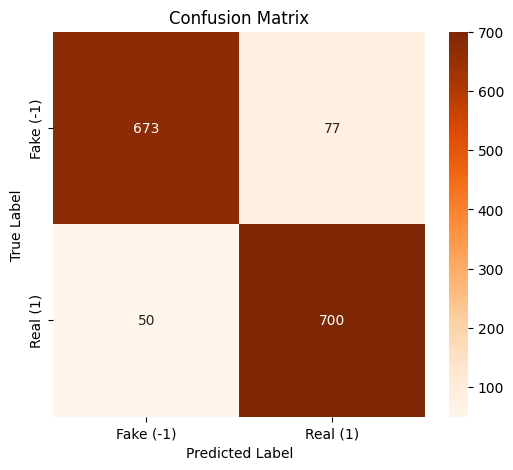

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Predict on Test Set
y_pred_prob = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf])
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# ✅ Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=['Fake (-1)', 'Real (1)'], yticklabels=['Fake (-1)', 'Real (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# ***CNN+Bi-LSTM***

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten, Concatenate
)

# ✅ Load Preprocessed Data (Train, Test, Validation)
train_df = pd.read_csv("/content/train-data.csv")
test_df = pd.read_csv("/content/test_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")

# ✅ Extract Features
embedding_columns = [f"dim_{i}" for i in range(768)]  # BERT 768D embeddings
pos_columns = train_df.columns[train_df.columns.str.match(r"^[A-Z]+$")].tolist()  # POS feature columns
tfidf_columns = train_df.columns.difference(["Processed_Review", "Label"] + embedding_columns + pos_columns + ["final_sentiment_score"]).tolist()  # TF-IDF features

# ✅ Extract BERT Embeddings
X_train_emb = train_df[embedding_columns].values
X_test_emb = test_df[embedding_columns].values
X_val_emb = val_df[embedding_columns].values

# ✅ Extract Sentiment Scores
X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)

# ✅ Extract POS Features
X_train_pos = train_df[pos_columns].values
X_test_pos = test_df[pos_columns].values
X_val_pos = val_df[pos_columns].values

# ✅ Extract TF-IDF Features
X_train_tfidf = train_df[tfidf_columns].values
X_test_tfidf = test_df[tfidf_columns].values
X_val_tfidf = val_df[tfidf_columns].values

# ✅ Labels
y_train = train_df["Label"].values
y_test = test_df["Label"].values
y_val = val_df["Label"].values

# ✅ Reshape BERT Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on BERT
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
tfidf_input = Input(shape=(X_train_tfidf.shape[1],), name="TFIDF_Input")  # TF-IDF Features

# ✅ CNN on BERT Embeddings
conv1d = Conv1D(filters=128, kernel_size=3, activation='relu', padding="same")(embedding_input)
conv1d = MaxPooling1D(pool_size=2)(conv1d)
conv1d = Flatten()(conv1d)

# ✅ Bi-LSTM on BERT Embeddings
bi_lstm_layer = Bidirectional(LSTM(64, return_sequences=False))(embedding_input)  # BiLSTM

# ✅ Merge CNN, BiLSTM, Sentiment, POS, and TF-IDF Features
merged = Concatenate()([conv1d, bi_lstm_layer, sentiment_input, pos_input, tfidf_input])

# ✅ Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary classification

# ✅ Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, tfidf_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_tfidf], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_tfidf], y_val),
    epochs=10, batch_size=16
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}%")

# ✅ Save Model
model.save("cnn_bilstm_bert_sentiment_pos_tfidf_model.h5")
print("✅ Model trained and saved successfully!")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 24, 128)        │         12,416 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 12, 128)        │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 1536)           │              0 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 128)            │         49,664 │ Embedding_Input[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 17)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 5001)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 6683)           │              0 │ flatten_1[0][0],       │
│ (Concatenate)             │                        │                │ bidirectional[0][0],   │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │        855,552 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │          8,256 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 64)             │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             65 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 925,953 (3.53 MB)

 Trainable params: 925,953 (3.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.7343 - loss: 0.5048 - val_accuracy: 0.8213 - val_loss: 0.4083
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8981 - loss: 0.2441 - val_accuracy: 0.8960 - val_loss: 0.2477
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9264 - loss: 0.1794 - val_accuracy: 0.9033 - val_loss: 0.2381
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9519 - loss: 0.1256 - val_accuracy: 0.9113 - val_loss: 0.2115
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.9622 - loss: 0.0945 - val_accuracy: 0.9113 - val_loss: 0.2183
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9780 - loss: 0.0608 - val_accuracy: 0.9087 - val_loss: 0.2743
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9794 - loss: 0.0514 - val_accuracy: 0.9007 - val_loss: 0.3253
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9877 - loss: 0.0349 - 

Test Accuracy: 91.3333%
✅ Model trained and saved successfully!


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step
🔹 Accuracy: 91.33%
🔹 Precision: 0.9282
🔹 Recall: 0.8960
🔹 F1 Score: 0.9118

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       750
           1       0.93      0.90      0.91       750

    accuracy                           0.91      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.91      0.91      0.91      1500



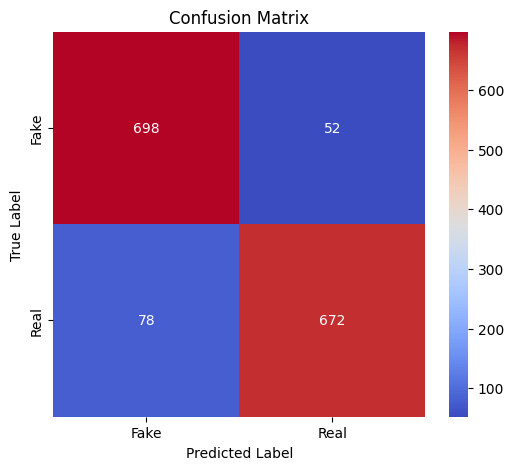

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Predict Test Data
y_pred_probs = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf])
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

# ✅ Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"🔹 Accuracy: {accuracy * 100:.2f}%")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# ✅ Print Classification Report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ***CNN+GRU***

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, GRU, Dense, Dropout, Flatten, Concatenate
)

# ✅ Load Preprocessed Data (Train, Test, Validation)
train_df = pd.read_csv("/content/train-data.csv")
test_df = pd.read_csv("/content/test_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")

# ✅ Extract Features
embedding_columns = [f"dim_{i}" for i in range(768)]  # BERT 768D embeddings
pos_columns = train_df.columns[train_df.columns.str.match(r"^[A-Z]+$")].tolist()  # POS feature columns
tfidf_columns = train_df.columns.difference(["Processed_Review", "Label"] + embedding_columns + pos_columns + ["final_sentiment_score"]).tolist()  # TF-IDF features

# ✅ Extract BERT Embeddings
X_train_emb = train_df[embedding_columns].values
X_test_emb = test_df[embedding_columns].values
X_val_emb = val_df[embedding_columns].values

# ✅ Extract Sentiment Scores
X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)

# ✅ Extract POS Features
X_train_pos = train_df[pos_columns].values
X_test_pos = test_df[pos_columns].values
X_val_pos = val_df[pos_columns].values

# ✅ Extract TF-IDF Features
X_train_tfidf = train_df[tfidf_columns].values
X_test_tfidf = test_df[tfidf_columns].values
X_val_tfidf = val_df[tfidf_columns].values

# ✅ Labels
y_train = train_df["Label"].values
y_test = test_df["Label"].values
y_val = val_df["Label"].values

# ✅ Reshape BERT Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on BERT
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
tfidf_input = Input(shape=(X_train_tfidf.shape[1],), name="TFIDF_Input")  # TF-IDF Features

# ✅ CNN on BERT Embeddings
conv1d = Conv1D(filters=128, kernel_size=3, activation='relu', padding="same")(embedding_input)
conv1d = MaxPooling1D(pool_size=2)(conv1d)
conv1d = Flatten()(conv1d)

# ✅ GRU on BERT Embeddings
gru_layer = GRU(128, return_sequences=False)(embedding_input)  # GRU

# ✅ Merge CNN, GRU, Sentiment, POS, and TF-IDF Features
merged = Concatenate()([conv1d, gru_layer, sentiment_input, pos_input, tfidf_input])

# ✅ Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary classification

# ✅ Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, tfidf_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_tfidf], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_tfidf], y_val),
    epochs=10, batch_size=16
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}%")

# ✅ Save Model
model.save("cnn_gru_bert_sentiment_pos_tfidf_model.h5")
print("✅ Model trained and saved successfully!")


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 24, 128)        │         12,416 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 12, 128)        │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 1536)           │              0 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru (GRU)                 │ (None, 128)            │         62,208 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 17)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 5001)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 6683)           │              0 │ flatten_2[0][0],       │
│ (Concatenate)             │                        │                │ gru[0][0],             │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │        855,552 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │          8,256 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 64)             │              0 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │             65 │ dropout_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 938,497 (3.58 MB)

 Trainable params: 938,497 (3.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 35s 62ms/step - accuracy: 0.7375 - loss: 0.5057 - val_accuracy: 0.8900 - val_loss: 0.2727
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.8998 - loss: 0.2430 - val_accuracy: 0.9040 - val_loss: 0.2273
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9288 - loss: 0.1752 - val_accuracy: 0.8907 - val_loss: 0.2665
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - accuracy: 0.9493 - loss: 0.1275 - val_accuracy: 0.8820 - val_loss: 0.3354
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.9626 - loss: 0.1037 - val_accuracy: 0.9127 - val_loss: 0.2512
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9717 - loss: 0.0703 - val_accuracy: 0.9153 - val_loss: 0.2339
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9854 - loss: 0.0444 - val_accuracy: 0.9180 - val_loss: 0.2736
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.9867 - loss: 0.0352 - 

Test Accuracy: 91.9333%
✅ Model trained and saved successfully!


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Accuracy: 0.9193
Precision: 0.9037
Recall: 0.9387
F1 Score: 0.9209

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       750
           1       0.90      0.94      0.92       750

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



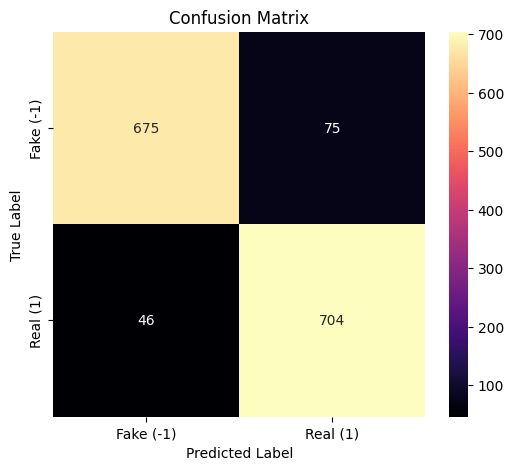

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Predict on Test Set
y_pred_prob = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf])
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# ✅ Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=['Fake (-1)', 'Real (1)'], yticklabels=['Fake (-1)', 'Real (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# ***CNN+Bi-LSTM+GRU***

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, GRU, Dense, Dropout, Flatten, Concatenate
)

# ✅ Load Preprocessed Data (Train, Test, Validation)
train_df = pd.read_csv("/content/train-data.csv")
test_df = pd.read_csv("/content/test_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")

# ✅ Extract Features
embedding_columns = [f"dim_{i}" for i in range(768)]  # BERT 768D embeddings
pos_columns = train_df.columns[train_df.columns.str.match(r"^[A-Z]+$")].tolist()  # POS feature columns
tfidf_columns = train_df.columns.difference(["Processed_Review", "Label"] + embedding_columns + pos_columns + ["final_sentiment_score"]).tolist()  # TF-IDF features

# ✅ Extract BERT Embeddings
X_train_emb = train_df[embedding_columns].values
X_test_emb = test_df[embedding_columns].values
X_val_emb = val_df[embedding_columns].values

# ✅ Extract Sentiment Scores
X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)

# ✅ Extract POS Features
X_train_pos = train_df[pos_columns].values
X_test_pos = test_df[pos_columns].values
X_val_pos = val_df[pos_columns].values

# ✅ Extract TF-IDF Features
X_train_tfidf = train_df[tfidf_columns].values
X_test_tfidf = test_df[tfidf_columns].values
X_val_tfidf = val_df[tfidf_columns].values

# ✅ Labels
y_train = train_df["Label"].values
y_test = test_df["Label"].values
y_val = val_df["Label"].values

# ✅ Reshape BERT Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on BERT
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
tfidf_input = Input(shape=(X_train_tfidf.shape[1],), name="TFIDF_Input")  # TF-IDF Features

# ✅ CNN on BERT Embeddings
conv1d = Conv1D(filters=128, kernel_size=3, activation='relu', padding="same")(embedding_input)
conv1d = MaxPooling1D(pool_size=2)(conv1d)
conv1d = Flatten()(conv1d)

# ✅ Bi-LSTM Layer
bilstm_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_input)

# ✅ GRU Layer
gru_layer = GRU(64)(bilstm_layer)

# ✅ Merge CNN, Bi-LSTM, GRU, Sentiment, POS, and TF-IDF Features
merged = Concatenate()([conv1d, gru_layer, sentiment_input, pos_input, tfidf_input])

# ✅ Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary classification

# ✅ Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, tfidf_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_tfidf], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_tfidf], y_val),
    epochs=10, batch_size=16
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}%")

# ✅ Save Model
model.save("cnn_bilstm_gru_bert_sentiment_pos_tfidf_model.h5")
print("✅ Model trained and saved successfully!")


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 24, 128)        │         12,416 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 12, 128)        │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 24, 128)        │         49,664 │ Embedding_Input[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 1536)           │              0 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_1 (GRU)               │ (None, 64)             │         37,248 │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 17)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 5001)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 6619)           │              0 │ flatten_3[0][0],       │
│ (Concatenate)             │                        │                │ gru_1[0][0],           │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 128)            │        847,360 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 128)            │              0 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 64)             │          8,256 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 64)             │              0 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 1)              │             65 │ dropout_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 955,009 (3.64 MB)

 Trainable params: 955,009 (3.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 35s 60ms/step - accuracy: 0.7215 - loss: 0.5153 - val_accuracy: 0.8620 - val_loss: 0.2913
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.8972 - loss: 0.2425 - val_accuracy: 0.9000 - val_loss: 0.2311
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.9258 - loss: 0.1809 - val_accuracy: 0.8960 - val_loss: 0.2601
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.9539 - loss: 0.1191 - val_accuracy: 0.9133 - val_loss: 0.1957
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.9707 - loss: 0.0812 - val_accuracy: 0.9093 - val_loss: 0.2225
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.9761 - loss: 0.0628 - val_accuracy: 0.9160 - val_loss: 0.2268
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.9850 - loss: 0.0475 - val_accuracy: 0.9147 - val_loss: 0.2680
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 48s 68ms/step - accuracy: 0.9870 - loss: 0.0346 - 

Test Accuracy: 91.6000%
✅ Model trained and saved successfully!


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
Accuracy: 0.9160
Precision: 0.8871
Recall: 0.9533
F1 Score: 0.9190

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       750
           1       0.89      0.95      0.92       750

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



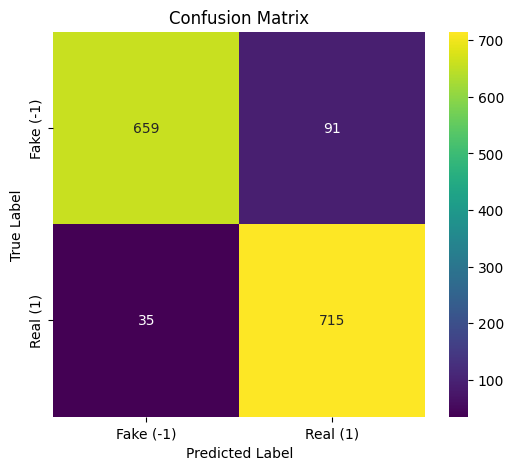

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Predict on Test Set
y_pred_prob = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf])
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# ✅ Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Fake (-1)', 'Real (1)'], yticklabels=['Fake (-1)', 'Real (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
